# Imports

In [ ]:
import sys, os, re
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, accuracy_score, f1_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import random
import math as mt
from matplotlib.colors import ListedColormap
from scipy.stats import pearsonr
from itertools import combinations
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import xgboost
import lightgbm
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer


In [ ]:
import math as mt
import os
import random
import re
import sys
import warnings
from itertools import combinations

import lightgbm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost
from matplotlib.colors import ListedColormap
from scipy.stats import pearsonr
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (ConfusionMatrixDisplay, accuracy_score,
                             confusion_matrix, f1_score, mean_squared_error,
                             r2_score, roc_auc_score, roc_curve)
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from Lectures/scripts/my_math import pi

## PCA in python

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [100]:
data_dir = 'https://raw.githubusercontent.com/Python-BI-2023/course_materials/main/data/'
titanic = pd.read_csv(data_dir + 'titanic.csv')
de_data = pd.read_csv(data_dir + 'DE_data_1.tsv', sep='\t', index_col='Unnamed: 0').T
meta = pd.DataFrame({'ENCFF240NOH': ('TAP pre-treated', 1), 
                     'ENCFF245SJH': ('TAP pre-treated', 2), 
                     'ENCFF321FEM': ('No treat', 1), 
                     'ENCFF368OTJ': ('No treat', 2), 
                     'ENCFF711LJB': ('AP-TAP pre-treated', 1), 
                     'ENCFF826APU': ('AP-TAP pre-treated', 2)}, index=['Sample', 'Replicate']).T

In [101]:
meta

,Sample,Replicate
ENCFF240NOH,TAP pre-treated,1
ENCFF245SJH,TAP pre-treated,2
ENCFF321FEM,No treat,1
ENCFF368OTJ,No treat,2
ENCFF711LJB,AP-TAP pre-treated,1
ENCFF826APU,AP-TAP pre-treated,2


In [108]:
de_data = StandardScaler().fit_transform(de_data)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(de_data)
pca_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'], index=meta.index)
pca_df = pca_df.merge(meta, left_index=True, right_index=True)

In [109]:
pca_df.head(3)

,PC1,PC2,Sample,Replicate
ENCFF240NOH,-28.193340,-15.993773,TAP pre-treated,1
ENCFF245SJH,-26.198769,-90.835465,TAP pre-treated,2
ENCFF321FEM,-90.869858,-51.687748,No treat,1


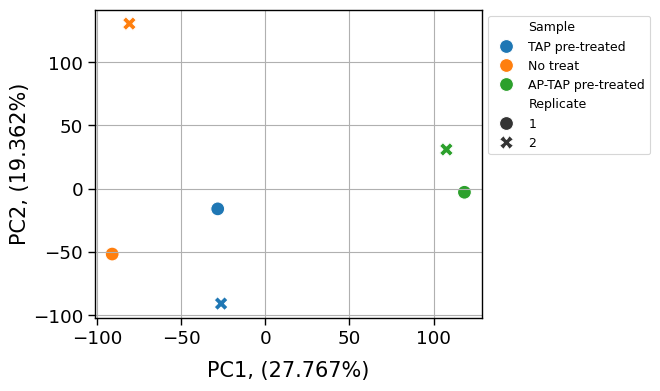

In [111]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.set_context("paper", font_scale=1.5)
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Sample", style = 'Replicate', s=100)
plt.legend(loc="upper right", fontsize=5)

var_pc1 = (pca.explained_variance_ratio_[0]*100).round(3)
var_pc2 = (pca.explained_variance_ratio_[1]*100).round(3)
plt.xlabel('PC1, ('+ var_pc1.astype(str) + "%)", fontsize = 15, labelpad = 10)
plt.ylabel('PC2, ('+ var_pc2.astype(str) + "%)", fontsize = 15, labelpad = 2)

handles, labels = plt.gca().get_legend_handles_labels()

plt.legend(handles, labels, fontsize=9, loc="upper left", bbox_to_anchor=(1,1))

ax.grid()

<a href="https://pandas.pydata.org/">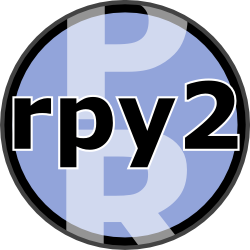</a>
# RPy2

[GitHub](https://rpy2.github.io/)


In [77]:
import os
#os.environ["R_HOME"] = r"C:\R\R-4.3.0" 
import rpy2

In [72]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [112]:
import rpy2.robjects as robjects

rprint = robjects.globalenv.find("print")

In [115]:
print(1);

1


In [114]:
rprint(1);

[1] 1


In [73]:
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [74]:
%R -i titanic

/home/nvaulin/mambaforge/envs/python_bi/lib/python3.11/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "Cabin". Fall back to string conversion. The error is: Series can only be of one type, or None (and here we have <class 'float'> and <class 'str'>). If happening with a pandas DataFrame the method infer_objects() will normalize data types before conversion.
  warnings.warn('Error while trying to convert '


In [75]:
%%R

print(head(titanic))
print('')
print(head(titanic$Pclass))

  PassengerId Pclass                                         Name    Sex  Age
0         892      3                             Kelly, Mr. James   male 34.5
1         893      3             Wilkes, Mrs. James (Ellen Needs) female 47.0
2         894      2                    Myles, Mr. Thomas Francis   male 62.0
3         895      3                             Wirz, Mr. Albert   male 27.0
4         896      3 Hirvonen, Mrs. Alexander (Helga E Lindqvist) female 22.0
5         897      3                   Svensson, Mr. Johan Cervin   male 14.0
  SibSp Parch  Ticket    Fare Cabin Embarked
0     0     0  330911  7.8292  <NA>        Q
1     1     0  363272  7.0000  <NA>        S
2     0     0  240276  9.6875  <NA>        Q
3     0     0  315154  8.6625  <NA>        S
4     1     1 3101298 12.2875  <NA>        S
5     0     0    7538  9.2250  <NA>        S
[1] ""
[1] 3 3 2 3 3 3


In addition: Warning messages:
1: Removed 1 rows containing non-finite values (`stat_ydensity()`). 
2: Removed 1 rows containing non-finite values (`stat_boxplot()`). 
3: `position_dodge()` requires non-overlapping x intervals 
4: `position_dodge()` requires non-overlapping x intervals 
5: Removed 1 rows containing missing values (`geom_point()`). 


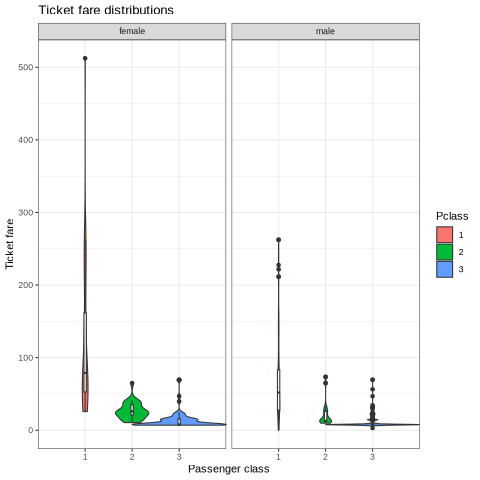

In [76]:
%%R
#install.packages("tidyverse")
library(tidyverse)

titanic$Pclass = as.factor(titanic$Pclass)
g = ggplot(titanic, aes(y=Fare, x=Pclass)) + geom_violin(width=2, aes(fill=Pclass)) + 
                                          geom_boxplot(width=0.05)  + 
                                          geom_jitter(alpha=0.004) + 
                                          facet_grid( ~ Sex) + theme_bw() + 
                                          ggtitle("Ticket fare distributions") + 
                                          ylab('Ticket fare') + 
                                          xlab('Passenger class')
plot(g)            